In [6]:


import pandas as pd 
data=pd.read_csv("C://Users//Lenovo//Downloads//diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
#handling the missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
#missing values found not significant

In [9]:
#Handling outliers

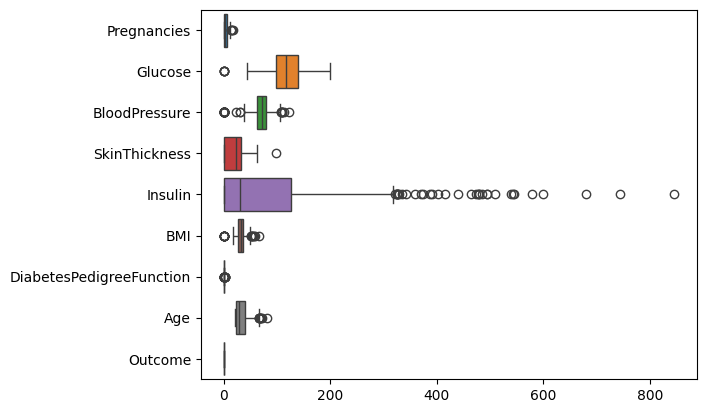

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(data=data, orient='h')
plt.show()


In [13]:
from scipy import stats


z_scores = stats.zscore(data.select_dtypes(include=[float, int]))


data = data[(z_scores < 3).all(axis=1)]


In [15]:

import pandas as pd


data = data.clip(lower=data.quantile(0.05), upper=data.quantile(0.95), axis=1)


data = data.infer_objects(copy=False)


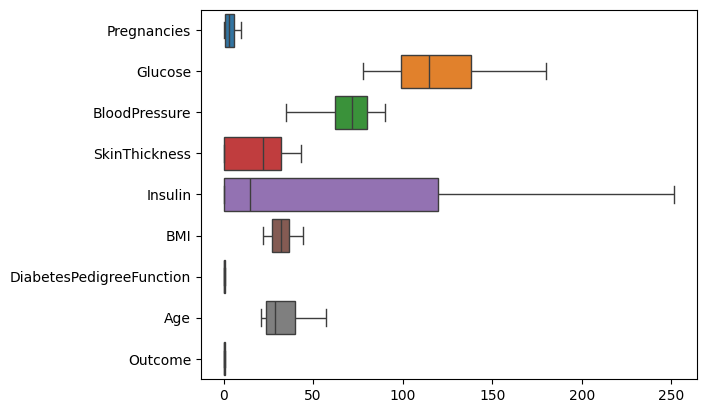

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(data=data, orient='h')
plt.show()


In [17]:
#outliers have been removed 

In [19]:
#removing duplicates
# Identify duplicate rows and keep the first occurrence
duplicate_rows = data[data.duplicated(keep='first')]

print("Duplicate Rows (keeping the first occurrence):")
print(duplicate_rows)


Duplicate Rows (keeping the first occurrence):
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [20]:
#no duplicates were found othewise  we would have removed them 

In [21]:
#feature engineering-creating new features 

In [22]:
import pandas as pd


data = pd.read_csv("C://Users//Lenovo//Downloads//diabetes.csv")


def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Category'] = data['BMI'].apply(bmi_category)


In [23]:

def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Senior'

data['Age_Group'] = data['Age'].apply(age_group)


In [24]:
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome   BMI_Category    Age_Group  
0                     0.627   50        1          Obese       Senior  
1                     0.351   31        0     Overweight  Middle-aged  
2                     0.672   32        1  Normal weight  Middle-aged  
3                     0.167   21        0     Overweight        Young  
4                     2.288   33        1          Obese  Middle-aged  


In [25]:
#visualisation after feature engineering

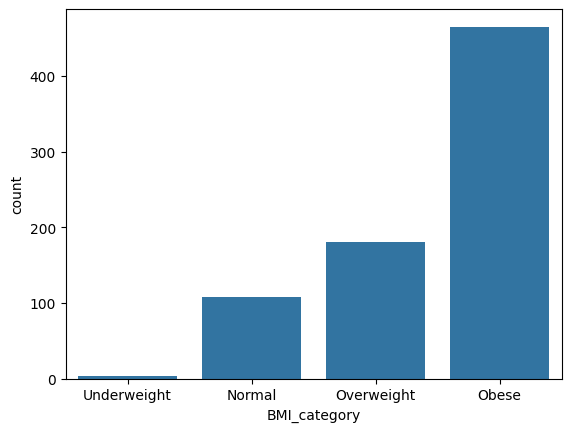

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


data['BMI_category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Plot the countplot
sns.countplot(x='BMI_category', data=data)
plt.show()


In [28]:
#correlation analysis

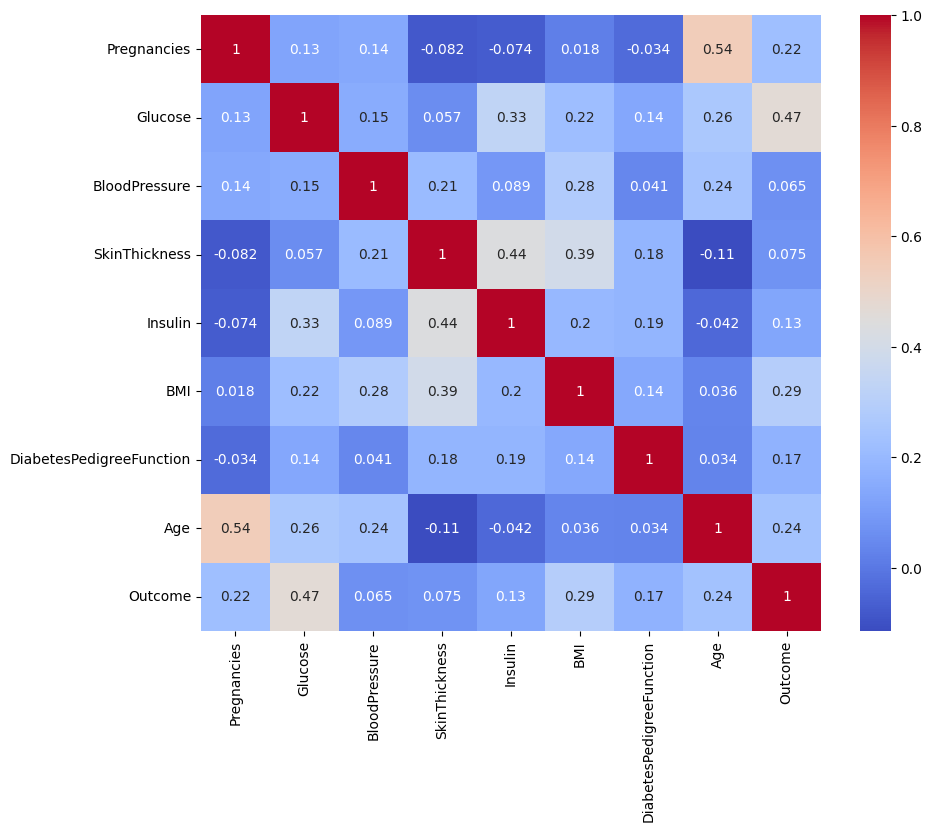

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C://Users//Lenovo//Downloads//diabetes.csv")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Calculate correlation with the target variable
target_correlation = correlation_matrix['Outcome'].sort_values(ascending=False)

# Display the correlation with the target variable
print(target_correlation)


In [33]:
#glucose and BMI are the most important features ,they can be used in classification

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64


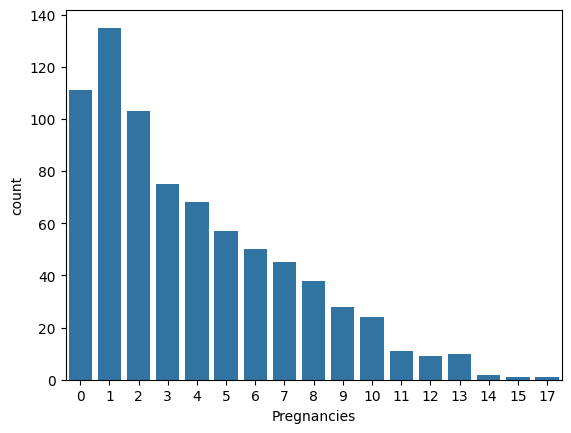

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("C://Users//Lenovo//Downloads//diabetes.csv")


print(data['Pregnancies'].value_counts())


sns.countplot(x='Pregnancies', data=data)
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
#Split the dataset into features (X) and the target variable (y).

In [37]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [38]:
## Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


data = pd.read_csv("C://Users//Lenovo//Downloads//diabetes.csv")


X = data.drop('Outcome', axis=1)
y = data['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [41]:

y_pred = model.predict(X_test)



Accuracy: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



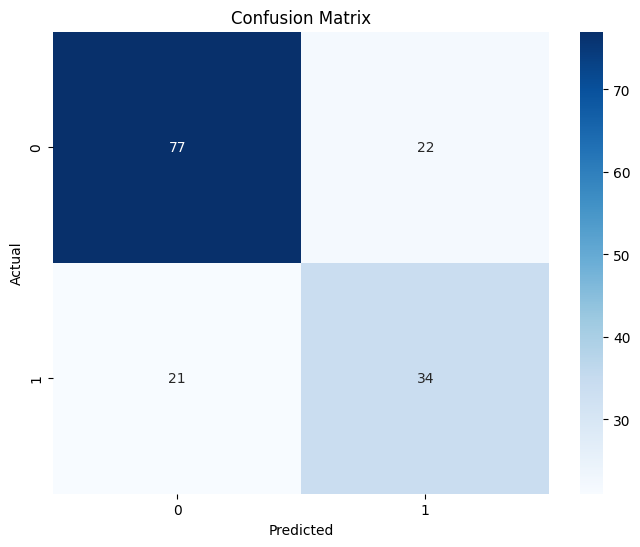

In [42]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
